# Detect if the image is of a horse or a human

## 1. Prepare Data

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/My Drive/ProtonX/Data 

/content/drive/My Drive/ProtonX/Data


In [ ]:
#download data
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
  -O /tmp/validation-horse-or-human.zip

--2020-10-25 01:24:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.7.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘./validation-horse-or-human.zip’

./validation-horse- 100%[===================>]  10.95M  53.1MB/s    in 0.2s    

2020-10-25 01:24:13 (53.1 MB/s) - ‘./validation-horse-or-human.zip’ saved [11480187/11480187]



In [ ]:
train_folder = './horse-or-human'

In [ ]:
!unzip -q horse-or-human.zip -d $train_folder

^C


In [ ]:
valid_folder = './validation-horse-or-human'

In [ ]:
!unzip -q validation-horse-or-human.zip -d $valid_folder

[validation-horse-or-human.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of validation-horse-or-human.zip or
        validation-horse-or-human.zip.zip, and cannot find validation-horse-or-human.zip.ZIP, period.


## 2. Begin creating model

In [ ]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
# Import CNN model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Flatten
from tensorflow.keras.optimizers import RMSprop

In [4]:
# Create model
model = Sequential([
                    Conv2D(16, (3, 3), activation='relu', 
                           input_shape=(150, 150, 3)), 
                    MaxPooling2D(2, 2),

                    Conv2D(32, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),
                    
                    Conv2D(64, (3, 3), activation='relu'),
                    MaxPooling2D(2, 2),

                    Flatten(), 
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
                    
])

# Optimizer
model.compile(loss='binary_crossentropy', 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

## Preprocess Data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255)
valid_generator = ImageDataGenerator(rescale=1/255)

In [ ]:
generated_train_data = train_generator.flow_from_directory(
    train_folder, 
    target_size = (150, 150), 
    batch_size = 128, 
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [ ]:
generated_valid_data = valid_generator.flow_from_directory(
    valid_folder, 
    target_size = (150, 150), 
    batch_size = 128, 
    class_mode = 'binary'
)

Found 256 images belonging to 2 classes.


In [ ]:
# Callback to prevent from overtraining
import keras
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
# Train the model
history = model.fit(
    generated_train_data, 
    steps_per_epoch = 8, 
    epochs = 15, 
    verbose = 1, 
    validation_data = generated_valid_data, 
    validation_steps = 8,
    callbacks = [early_stopping_cb]
)

Epoch 1/15
8/8 [==============================] - 9s 1s/step - loss: 1.9088 - acc: 0.5050 - val_loss: 0.6043 - val_acc: 0.6445
Epoch 2/15
8/8 [==============================] - 5s 617ms/step - loss: 0.5999 - acc: 0.7152
Epoch 3/15
8/8 [==============================] - 5s 616ms/step - loss: 0.2860 - acc: 0.8699
Epoch 4/15
8/8 [==============================] - 5s 645ms/step - loss: 0.0949 - acc: 0.9700
Epoch 5/15
8/8 [==============================] - 5s 627ms/step - loss: 0.3940 - acc: 0.8487
Epoch 6/15
8/8 [==============================] - 6s 726ms/step - loss: 0.2030 - acc: 0.9155
Epoch 7/15
8/8 [==============================] - 5s 650ms/step - loss: 0.0398 - acc: 0.9889
Epoch 8/15
8/8 [==============================] - 5s 620ms/step - loss: 0.1030 - acc: 0.9522
Epoch 9/15
8/8 [==============================] - 5s 621ms/step - loss: 0.0369 - acc: 0.9900
Epoch 10/15
8/8 [==============================] - 6s 710ms/step - loss: 0.0111 - acc: 0.9971
Epoch 11/15
8/8 [==================

## Plot the model

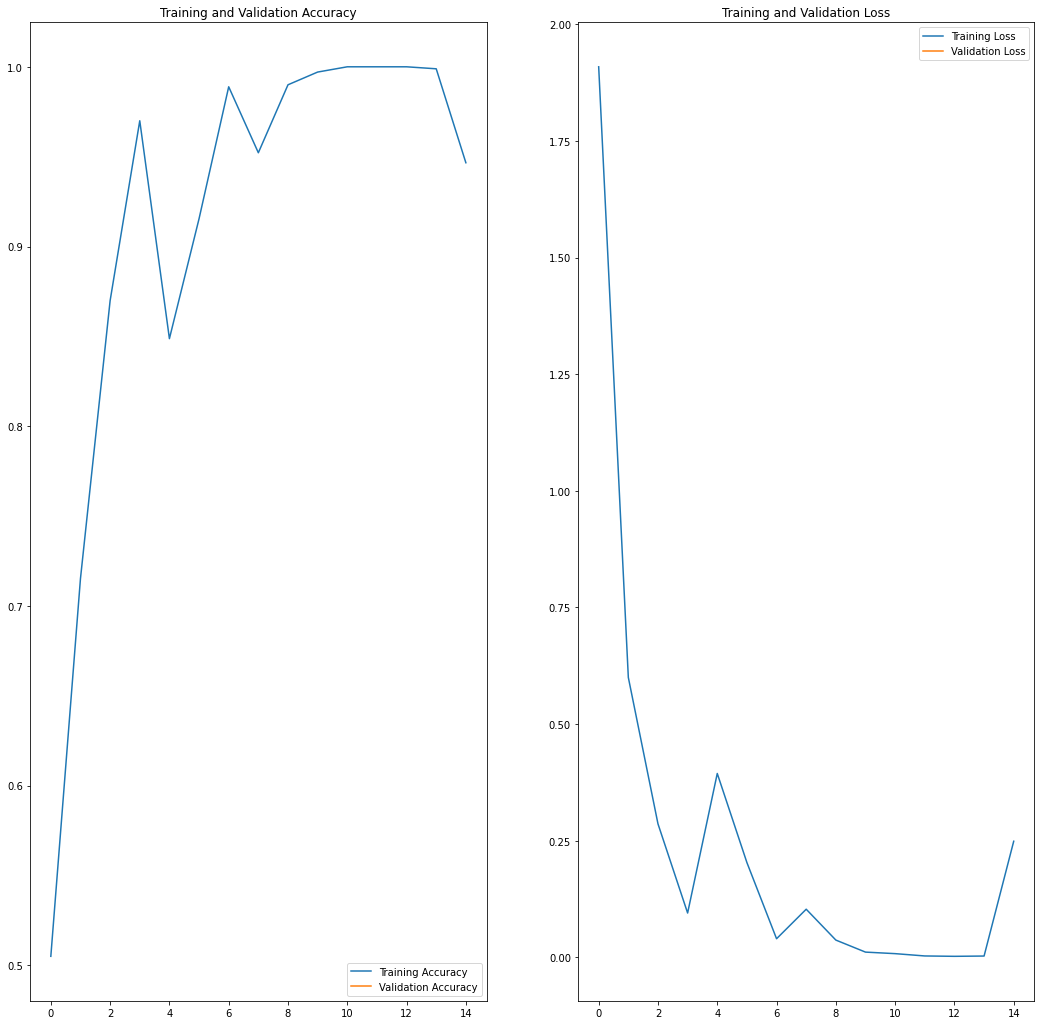

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = 200

plt.figure(figsize=(18, 18))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict with real photos

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys(): 
  path = './' + fn
  img = image.load_img(path, target_size=(150,150))
  
  x = image.img_to_array(img) / 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  print(images.shape)

  classes = model.predict(images, batch_size=10)

  if classes[0] > 0.5: 
    print(fn + " is a human.")
  else: 
    print(fn + " is a horse.")


Saving maxresdefault.jpg to maxresdefault.jpg
(1, 150, 150, 3)
maxresdefault.jpg is a horse.


In [ ]:
model.layers

In [ ]:
output_layers = [
  layer.output for layer in model.layers
]

output_layers

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from google.colab import files
from keras.preprocessing import image

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys(): 
  path = './' + fn
  img = image.load_img(path, target_size=(150,150))
  
  x = image.img_to_array(img) / 255
  x = x.reshape((1,) + x.shape)

  print(x.shape)

  classes = model.predict(x, batch_size=10)

  if classes[0] > 0.5: 
    print(fn + " is a human.")
  else: 
    print(fn + " is a horse.")

  visualization_model = tf.keras.models.Model(inputs = model.input, outputs = output_layers)
  successive_feature_maps = visualization_model.predict(x)

  layer_names = [layer.name for layer in model.layers]

  for layer_name, feature_map in zip(layer_names, successive_feature_maps): 
    if len(feature_map.shape) == 4: 
      n_features = feature_map.shape[-1] # number of features in feature map

      # The feature map has shape (1, size, size, n_features)
      size = feature_map.shape[1]

      # Title our images in this matrix
      display_grid = np.zeros((size, size*n_features))

      for i in range(n_features): 
        # Postprocess the feature to make it visually palatable
        x = feature_map[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64 
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')

        #Title each filter into this big horizontal grid
        display_grid[:, i*size : (i+1) * size] = x

      # Display the grid
      scale = 20. / n_features
      plt.figure(figsize=(scale*n_features, scale))
      plt.title(layer_name)
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')